In [1]:
import numpy as np
from matplotlib.pyplot import *
import basic
import prjlib
import plottools as pl
import binning as bins
s = (180./np.pi)**2

In [2]:
#Planck Low-L
pL0 = np.linspace(1,30,30)
pc0 = np.array([8,-2.5,0.0,2.0,0.,0.,0.8,0.0,-.3,-.1,-.1,-.1,0.5,0.1,-.1,0.0,-.2,0.4,0.4,1.0,0.0,0.0,0.1,0.3,0.0,0.2,0.3,0.0,0.5,0.0])*1e-2
pv0 = np.array([2,2.10,2.0,1.5,1.,1.,1.0,1.0,1.0,1.0,0.8,0.8,0.6,0.6,0.6,0.6,0.5,0.4,0.4,0.4,0.4,0.4,0.3,0.3,0.3,0.2,0.2,0.2,0.2,0.2])*1e-2
#Planck High-L
pL1 = np.linspace(60,750,14)
pc1 = np.array([2.5,31,16.5,-2,5,-2.1,34,4,17.5,-11.5,14,11.5,0.5,-44])*(0.1/28.)*1e-2
pv1 = np.array([29.5,21,15,15,14,13.5,14,13.5,14,15,17,20.5,24.5,32])*(0.1/28.)*1e-2

In [3]:
#PB
pbL = np.array([250,550,850,1150,1450,1750])
pbc = np.array([0.2,1.7,0.,.5,0.,-.9])*1e-4
pbv = np.array([0.5,.9,1.,1.,.8,.9])*1e-4

In [4]:
#BK
bkL = np.array([0.3595e2,0.1059e3,0.1757e3,0.2457e3,0.3156e3,0.3855e3,0.4554e3,0.5253e3,0.5952e3,0.6651e3])
bkc = np.array([-0.355,-0.594,-0.354,-0.69,-2.15,-1.43,1.64,-0.854,-1.47,1.77])*1e-7*s
bkv = np.array([0.986,0.74,0.869,1.414,1.54,1.15,0.975,1.12,1.19,1.33])*1e-7*s

[  46.55471932  116.29644256  219.30273499  355.57359661  525.10902742
  727.90902742  963.97359661 1233.30273499 1535.89644256 1871.75471932]


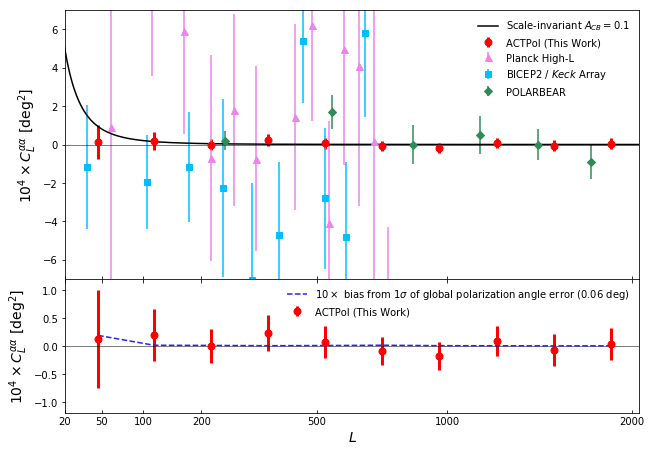

In [18]:
xmin, xmax = 20, 2048
a = 1e4
rcParams.update({'font.size': 13,'legend.fontsize':10,'font.family':'sans','font.style':'normal'})
fig = subplots(figsize=[11,7])
ax0 = subplot2grid((3,1),(0,0),rowspan=2)
ax1 = subplot2grid((3,1),(2,0))
ax1.set_xlabel('$L$',fontsize=14)
ax0.set_ylabel(r'$10^4 \times C_L^{\alpha\alpha}$ [deg$^2$]',fontsize=14)
ax1.set_ylabel(r'$10^4 \times C_L^{\alpha\alpha}$ [deg$^2$]',fontsize=14)
ax0.set_xlim(np.sqrt(xmin),np.sqrt(xmax))
ax1.set_xlim(np.sqrt(xmin),np.sqrt(xmax))
xs = np.array([20,50,100,200,500,1000,2000])
ax0.set_xticks(np.sqrt(xs))
ax1.set_xticks(np.sqrt(xs))
ax0.set_xticklabels([]*len(xs))
ax1.set_xticklabels(xs)
ax0.tick_params(axis="x",direction="in",pad=-20)
ax1.tick_params(axis="x",direction="in",bottom=True,top=True)
ax0.set_ylim(-7,7)
ax1.set_ylim(-1.2,1.2)
ax0.axhline(0,color='k',ls='-',lw=0.5)
ax1.axhline(0,color='k',ls='-',lw=0.5)

# load spectrum
ps, __ = prjlib.filename_init(doreal='True',rlmin='200',rlmax='2048',dearot='True',ver='v1')
mb = bins.multipole_binning(10,lmin=20,lmax=2048,spc='p2')
scl = s*np.array([np.loadtxt(ps.quad.f['EB'].cl[i],unpack=True)[1] for i in range(1,101)])
vcl = np.std(scl,axis=0)
sci = bins.binning(scl,mb)
vcb = np.std(sci,axis=0)
ocl = s*np.loadtxt(ps.quad.f['EB'].cl[0],unpack=True)[1]
ocb = bins.binning(ocl,mb)
pa, __ = prjlib.filename_init(rlmin='200',stype='absrot')
acl = s*np.array([np.loadtxt(pa.quad.f['EB'].cl[i],unpack=True)[1] for i in range(1,101)])
dcl = np.mean(acl-scl,axis=0) * (.06/.08)**2
dcb = bins.binning(dcl,mb)

#b, ocb, vcb, ocl, vcl, dcb = load_spectrum(10,xmin)
ax0.errorbar(np.sqrt(mb.bc),a*ocb,yerr=a*vcb,fmt='o',label='ACTPol (This Work)',color='r',lw=3,ms=7)
ax0.errorbar(np.sqrt(pL1),a*pc1,yerr=a*pv1,fmt='^',label='Planck High-L',color='violet',lw=1.5,ms=7)
ax0.errorbar(np.sqrt(bkL),a*bkc,yerr=a*bkv,fmt='s',label='BICEP2 / $Keck$ Array',color='deepskyblue',lw=1.5)
ax0.errorbar(np.sqrt(pbL),a*pbc,yerr=a*pbv,fmt='D',label='POLARBEAR',color='seagreen',lw=1.5,ms=5)
x = np.arange(1,2048,1)
ps, __ = prjlib.filename_init(rlmin='200',rlmax='2048',dearot='True')
ax0.plot(np.sqrt(x),2.*np.pi/x/(x+1.)*a*.1*1e-4*s,label=r'Scale-invariant $A_{CB}=0.1$',color='k')
ax1.errorbar(np.sqrt(mb.bc),a*ocb,yerr=a*vcb,fmt='o',label='ACTPol (This Work)',color='r',lw=3,ms=7)
ax0.legend(loc=0,frameon=False)
ax1.plot(np.sqrt(mb.bc),a*dcb*10,ls='--',label=r'$10\times$ bias from $1\sigma$ of global polarization angle error ($0.06$ deg)')
ax1.legend(loc=0,frameon=False)
subplots_adjust(bottom=0.1,right=.85,top=0.9,wspace=0,hspace=0)
savefig('fig_comparison.eps')

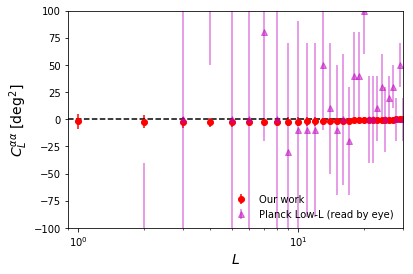

In [6]:
pl.plot_1dstyle(ylab=r'$C_L^{\alpha\alpha}$ [deg$^2$]',xmin=.9,xmax=30,ymin=-100,ymax=100)
xscale('log')
a = 1e4
L = np.linspace(0,2048,2049)
errorbar(L,a*ocl,yerr=a*vcl,fmt='o',label='Our work',color='r')
errorbar(pL0,a*pc0,yerr=a*pv0,fmt='^',label='Planck Low-L (read by eye)',color='m',alpha=0.5)
legend(loc=0,frameon=False)
axhline(0,ls='--',color='k')
#savefig('fig_comparison_lowl.png')